In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 25.2 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.0/36.0 MB 31.6 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:0000:010:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


I use AMEX-Feather-Dataset because the dataset in this competion is very huge and reading raw CSV files,lead me to create a out of memory error. 

In [7]:
train_dataset_ = pd.read_feather('../input/amexfeather/train_data.ftr')
# Keep the latest statement features for each customer
train_dataset = train_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [8]:
del train_dataset_
gc.collect()

0

In [9]:
train_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [10]:
train_dataset.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float16       
 2    D_39    458913 non-null  float16       
 3    B_1     458913 non-null  float16       
 4    B_2     458882 non-null  float16       
 5    R_1     458913 non-null  float16       
 6    S_3     373943 non-null  float16       
 7    D_41    458882 non-null  float16       
 8    B_3     458882 non-null  float16       
 9    D_42    59910 non-null   float16       
 10   D_43    324591 non-null  float16       
 11   D_44    436618 non-null  float16       
 12   B_4     458913 non-null  float16       
 13   D_45    458882 non-null  float16       
 14   B_5     458913 non-null  float

In [11]:
train_dataset.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,455944.000000,4.589130e+05,458913.000000,4.588820e+05,4.589130e+05,373943.000000,4.588820e+05,4.588820e+05,59910.000000,324591.000000,...,1.639500e+04,1.639500e+04,456083.000000,458913.000000,4.560830e+05,80315.000000,456083.000000,458913.000000,456083.000000,458913.000000
mean,NaN,NaN,0.000000,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.177979,0.000000,...,1.412201e-02,1.589355e-01,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.258934
std,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.253662,0.000000,...,9.527588e-02,2.609863e-01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.438050
min,-0.458984,5.960464e-08,-3.570312,1.788139e-07,5.960464e-08,-0.508789,5.960464e-08,5.960464e-08,-0.000240,0.000002,...,3.576279e-07,1.788139e-07,0.000000,0.000000,1.192093e-07,-0.011436,0.000000,0.000000,0.000000,0.000000
25%,0.449219,4.783630e-03,0.008987,7.092285e-02,2.956390e-03,0.127563,3.007889e-03,5.485535e-03,0.031769,0.043335,...,2.519608e-03,3.482819e-03,0.003046,0.002552,3.026962e-03,0.200684,0.003033,0.002758,0.003031,0.000000
50%,0.682617,9.559631e-03,0.033234,8.134766e-01,5.920410e-03,0.164917,6.011963e-03,1.083374e-02,0.108276,0.092407,...,5.050659e-03,7.026672e-03,0.006077,0.005119,6.050110e-03,0.385986,0.006065,0.005501,0.006073,0.000000
75%,0.862305,2.666016e-01,0.153687,1.001953e+00,8.888245e-03,0.264893,8.995056e-03,2.106934e-01,0.230347,0.195068,...,7.579803e-03,5.014648e-01,0.009102,0.007675,9.101868e-03,0.573730,0.009094,0.008255,0.009102,1.000000
max,1.009766,5.000000e+00,1.324219,1.009766e+00,2.759766e+00,3.994141,8.992188e+00,1.596680e+00,4.187500,9.187500,...,1.009766e+00,2.505859e+00,1.009766,1.009766,1.339844e+00,2.228516,1.009766,1.343750,4.828125,1.000000


The following features are categorical: ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [12]:
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

num_cols = [col for col in train_dataset.columns if col not in categorical_cols + ["target"]]

print(f'Total number of features: {1}')
print(f'Total number of categorical features: {len(categorical_cols)}')
print(f'Total number of continuos features: {len(num_cols)}')

Total number of features: 1
Total number of categorical features: 11
Total number of continuos features: 178


<AxesSubplot: xlabel='target', ylabel='count'>

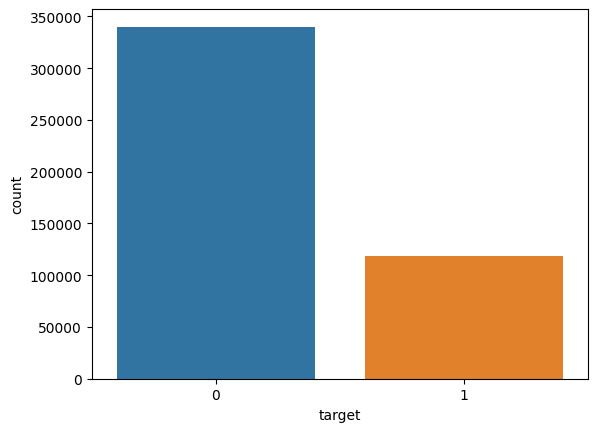

In [13]:
sns.countplot(x = 'target', data = train_dataset)

In [14]:
# plt.figure(figsize=(20, 30))
# for i, k in enumerate(categorical_cols):
#     plt.subplot(6, 2, i+1)
#     temp_val = pd.DataFrame(train_dataset[k].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
#     temp_val.index.name = 'value'
#     temp_val.reset_index(inplace=True)
#     plt.bar(temp_val.index, temp_val['count'], alpha=0.5)
#     plt.xlabel(k)
#     plt.ylabel('frequency')
#     plt.xticks(temp_val.index, temp_val.value)
# plt.show()

In [15]:
# plt.figure(figsize=(20, 30))
# for i, f in enumerate(categorical_cols):
#     plt.subplot(6, 2, i+1)
#     temp = pd.DataFrame(train_dataset[f][train_dataset.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
#     temp.index.name = 'value'
#     temp.reset_index(inplace=True)
#     plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
#     temp = pd.DataFrame(train_dataset[f][train_dataset.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
#     temp.index.name = 'value'
#     temp.reset_index(inplace=True)
#     plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
#     plt.xlabel(f)
#     plt.ylabel('frequency')
#     plt.legend()
#     plt.xticks(temp.index, temp.value)
# plt.show()

In [16]:
# for i, l in enumerate(num_cols):
#     if i % 4 == 0: 
#         if i > 0: plt.show()
#         plt.figure(figsize=(20, 3))
#     plt.subplot(1, 4, i % 4 + 1)
#     plt.hist(train_dataset[l], bins=200, color='#C69C73')
#     plt.xlabel(l)
# plt.show()
# Delinquency = [d for d in train_dataset.columns if d.startswith('D_')]
# Spend = [s for s in train_dataset.columns if s.startswith('S_')]
# Payment = [p for p in train_dataset.columns if p.startswith('P_')]
# Balance = [b for b in train_dataset.columns if b.startswith('B_')]
# Risk = [r for r in train_dataset.columns if r.startswith('R_')]
# Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

# plt.figure(figsize=(10,5))
# sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

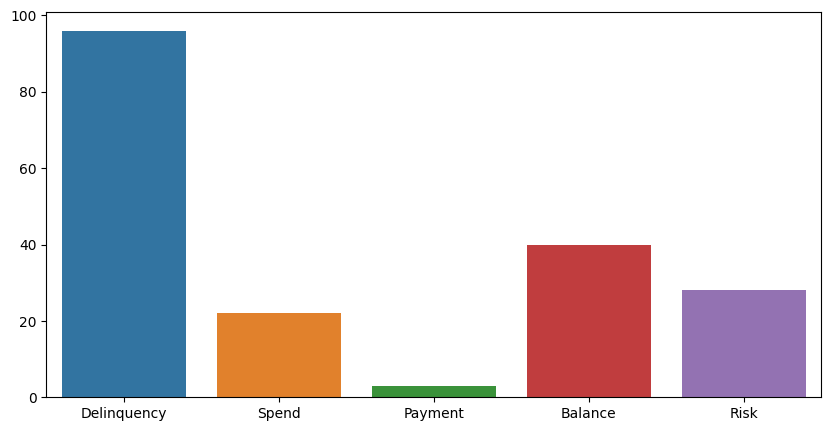

In [17]:
Delinquency = [d for d in train_dataset.columns if d.startswith('D_')]
Spend = [s for s in train_dataset.columns if s.startswith('S_')]
Payment = [p for p in train_dataset.columns if p.startswith('P_')]
Balance = [b for b in train_dataset.columns if b.startswith('B_')]
Risk = [r for r in train_dataset.columns if r.startswith('R_')]
Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

plt.figure(figsize=(10,5))
sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

In [18]:
NaN_Val = np.array(train_dataset.isnull().sum())
NaN_prec = np.array((train_dataset.isnull().sum() * 100 / len(train_dataset)).round(2))
NaN_Col = pd.DataFrame([np.array(list(train_dataset.columns)).T,NaN_Val.T,NaN_prec.T,np.array(list(train_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)
NaN_Col

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,2969,0.65,float16
2,D_39,0,0.0,float16
3,B_1,0,0.0,float16
4,B_2,31,0.01,float16
5,R_1,0,0.0,float16
6,S_3,84970,18.52,float16
7,D_41,31,0.01,float16
8,B_3,31,0.01,float16
9,D_42,399003,86.95,float16


In [19]:
train_dataset = train_dataset.drop(['S_2','D_66','D_42','D_49','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

In [20]:
selected_col = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for col in selected_col:
    train_dataset[col] = train_dataset[col].fillna(train_dataset[col].median())

In [21]:
selcted_col2 = np.array(['D_68','B_30','B_38','D_64','D_114','D_116','D_117','D_120','D_126'])

for col2 in selcted_col2:
    train_dataset[col2] =  train_dataset[col2].fillna(train_dataset[col2].mode()[0])

In [22]:
print(train_dataset.isnull().sum().to_string())

P_2       0
D_39      0
B_1       0
B_2       0
R_1       0
S_3       0
D_41      0
B_3       0
D_43      0
D_44      0
B_4       0
D_45      0
B_5       0
R_2       0
D_46      0
D_47      0
D_48      0
B_6       0
B_7       0
B_8       0
D_50      0
D_51      0
B_9       0
R_3       0
D_52      0
P_3       0
B_10      0
D_53      0
S_5       0
B_11      0
S_6       0
D_54      0
R_4       0
S_7       0
B_12      0
S_8       0
D_55      0
D_56      0
B_13      0
R_5       0
D_58      0
S_9       0
B_14      0
D_59      0
D_60      0
D_61      0
B_15      0
S_11      0
D_62      0
D_63      0
D_64      0
D_65      0
B_16      0
B_17      0
B_18      0
B_19      0
B_20      0
D_68      0
S_12      0
R_6       0
S_13      0
B_21      0
D_69      0
B_22      0
D_70      0
D_71      0
D_72      0
S_15      0
B_23      0
P_4       0
D_74      0
D_75      0
B_24      0
R_7       0
D_77      0
B_25      0
B_26      0
D_78      0
D_79      0
R_8       0
S_16      0
D_80      0
R_10      0
R_11

In [23]:
train_dataset.shape

(458913, 166)

In [24]:
train_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.092407,0.003258,...,0.005703,0.006210,0.002716,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,0.008781,...,0.001928,0.002996,0.001701,0.002981,0.007481,0.007874,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880859,0.009705,0.004284,0.812500,0.006451,0.164917,0.003796,0.007195,0.092407,0.000628,...,0.003469,0.009880,0.007690,0.007381,0.006622,0.000965,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.046112,0.007793,...,0.004578,0.001789,0.005138,0.002705,0.006184,0.001899,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.872070,0.005573,0.007679,0.815918,0.001247,0.164917,0.000231,0.005527,0.044678,0.002436,...,0.008896,0.005047,0.003706,0.002974,0.004162,0.005764,0.008156,0.006943,0.000905,0


In [25]:
test_dataset_ = pd.read_feather('../input/amexfeather/test_data.ftr')
# Keep the latest statement features for each customer
test_dataset = test_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [26]:
del test_dataset_
gc.collect()

3533

In [27]:
test_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-10-12,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.10376,...,NaN,NaN,NaN,0.005913,0.001250,0.006542,NaN,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,2019-04-15,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,NaN,...,NaN,NaN,NaN,0.004345,0.000866,0.009117,NaN,0.002197,0.000247,0.007778
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,2019-10-16,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,NaN,...,NaN,NaN,NaN,1.000977,0.008896,0.895996,0.150146,1.009766,0.457764,0.092041
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,2019-04-22,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,NaN,...,NaN,NaN,NaN,1.007812,0.003754,0.919922,0.255371,1.007812,0.500977,0.182983
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,2019-10-22,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,NaN,...,NaN,NaN,NaN,0.006622,0.001140,0.009529,NaN,0.009407,0.001557,0.000525


In [28]:
test_dataset.shape

(924621, 189)

In [29]:
NaN_Val2 = np.array(test_dataset.isnull().sum())
NaN_prec2 = np.array((test_dataset.isnull().sum() * 100 / len(test_dataset)).round(2))
NaN_Col2 = pd.DataFrame([np.array(list(test_dataset.columns)).T,NaN_Val2.T,NaN_prec2.T,np.array(list(test_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)

NaN_Col2

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,4784,0.52,float16
2,D_39,0,0.0,float16
3,B_1,0,0.0,float16
4,B_2,43,0.0,float16
5,R_1,0,0.0,float16
6,S_3,144280,15.6,float16
7,D_41,43,0.0,float16
8,B_3,43,0.0,float16
9,D_42,827578,89.5,float16


In [30]:
test_dataset = test_dataset.drop(['S_2','D_42','D_49','D_66','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

In [31]:
selected_column = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','S_12','S_17','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for column in selected_column:
    test_dataset[column] = test_dataset[column].fillna(test_dataset[column].median())

In [32]:
selected_column2 = np.array(['D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126'])

for column2 in selected_column2:
    test_dataset[column2] =  test_dataset[column2].fillna(test_dataset[column2].mode()[0])

In [33]:
print(test_dataset.isnull().sum().to_string())

P_2      0
D_39     0
B_1      0
B_2      0
R_1      0
S_3      0
D_41     0
B_3      0
D_43     0
D_44     0
B_4      0
D_45     0
B_5      0
R_2      0
D_46     0
D_47     0
D_48     0
B_6      0
B_7      0
B_8      0
D_50     0
D_51     0
B_9      0
R_3      0
D_52     0
P_3      0
B_10     0
D_53     0
S_5      0
B_11     0
S_6      0
D_54     0
R_4      0
S_7      0
B_12     0
S_8      0
D_55     0
D_56     0
B_13     0
R_5      0
D_58     0
S_9      0
B_14     0
D_59     0
D_60     0
D_61     0
B_15     0
S_11     0
D_62     0
D_63     0
D_64     0
D_65     0
B_16     0
B_17     0
B_18     0
B_19     0
B_20     0
D_68     0
S_12     0
R_6      0
S_13     0
B_21     0
D_69     0
B_22     0
D_70     0
D_71     0
D_72     0
S_15     0
B_23     0
P_4      0
D_74     0
D_75     0
B_24     0
R_7      0
D_77     0
B_25     0
B_26     0
D_78     0
D_79     0
R_8      0
S_16     0
D_80     0
R_10     0
R_11     0
B_27     0
D_81     0
D_82     0
S_17     0
R_12     0
B_28     0
R_13     0

In [34]:
test_dataset.shape

(924621, 165)

In [35]:
test_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.007397,0.006786,...,0.004902,0.000975,0.006271,0.008820,0.005913,0.001250,0.006542,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,0.096863,0.004234,...,0.001252,0.007633,0.002768,0.008789,0.004345,0.000866,0.009117,0.002197,0.000247,0.007778
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,0.105286,0.003382,...,1.003906,0.001152,0.002045,0.001852,1.000977,0.008896,0.895996,1.009766,0.457764,0.092041
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,0.211670,0.258545,...,0.009438,0.002775,0.009377,0.003622,1.007812,0.003754,0.919922,1.007812,0.500977,0.182983
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,0.071899,0.375732,...,0.003340,0.001000,0.007942,0.009232,0.006622,0.001140,0.009529,0.009407,0.001557,0.000525


In [36]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
categorical_cols.remove('D_66')

train_dataset[categorical_cols] = enc.fit_transform(train_dataset[categorical_cols])
test_dataset[categorical_cols] = enc.transform(test_dataset[categorical_cols])

In [37]:
train_dataset_without_target = train_dataset.drop(["target"],axis=1)

cor_matrix = train_dataset_without_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'D_77',
 'S_24',
 'S_7'}

In [38]:
train_dataset = train_dataset.drop(col_core, axis=1)
test_dataset = test_dataset.drop(col_core, axis=1)

In [39]:
train_dataset.shape

(458913, 151)

In [40]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# print(train_dataset.iloc[:,0:-1])
# train_dataset.iloc[:,0:-1] = ss.fit_transform(train_dataset.iloc[:,0:-1])
# test_dataset.iloc[:,1:-1] = ss.fit_transform(test_dataset.iloc[:,1:-1])

In [41]:
num_columns = [col for col in train_dataset.columns if col not in ["target"]]

X = train_dataset[num_columns]
y = train_dataset['target']

print(f"X shape is = {X.shape}" )
print(f"Y shape is = {y.shape}" )

X shape is = (458913, 150)
Y shape is = (458913,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape is = {x_train.shape}" )
print(f"Y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {x_test.shape}" )
print(f"Y_test shape is = {y_test.shape}" )

X_train shape is = (367130, 150)
Y_train shape is = (367130,)
X_test shape is = (91783, 150)
Y_test shape is = (91783,)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(X.copy())
X_scaled = scaler2.transform(X.copy())

scaler2.fit(test_dataset.copy())
test_data_scaled = scaler2.transform(test_dataset.copy())
pd.DataFrame(test_data_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.264481,-0.221430,-0.565020,0.997483,-0.353858,-0.370347,-0.320700,-0.598378,-0.765401,-0.495423,...,-0.850619,-0.130131,-0.555064,-0.401338,-0.271711,0.196260,-0.456779,-0.181259,-0.263812,-0.305828
1,0.748918,-0.208513,-0.538985,0.995118,-0.343817,-0.569564,-0.301442,-0.568288,-0.265519,-0.505957,...,-0.868245,-0.128274,-0.563667,-0.381320,-0.289410,0.194551,-0.460913,-0.183770,-0.282754,-0.282990
2,0.214977,-0.524029,-0.606923,0.513881,-0.369351,-0.280862,-0.305777,-0.550703,-0.218458,-0.509476,...,-0.851915,-0.129215,1.799628,-0.400805,-0.293062,-0.194059,2.167087,-0.131305,2.233856,0.139147
3,-0.471519,0.296966,0.060477,-0.949636,-0.370587,-0.200522,-0.302697,1.309381,0.375952,0.543706,...,-0.852316,-0.144887,-0.544374,-0.395925,-0.256025,-0.094903,2.185112,-0.164902,2.471553,0.594747
4,-1.434066,1.427447,1.926476,-1.355643,1.432039,-0.269105,-0.290502,2.591037,-0.404999,1.027395,...,1.167653,-0.137767,-0.558746,-0.401261,-0.263271,0.219340,-0.454908,-0.181982,-0.275547,-0.319327


In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# knn = KNeighborsClassifier(n_neighbors=130)
  
# knn.fit(X, y)


# # Make predictions on the test set
# predictions = knn.predict(test_dataset[num_columns])

# # mae = mean_absolute_error(y_test,y_pred)
# # print("MAE Score : ",mae)

# # mse = mean_squared_error(y_test,y_pred)
# # print("MSE Score : ",mse)

# # sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
# # output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
# # output.to_csv('submission2.csv', index=False)

In [81]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split


# # Initialize the decision tree classifier
# model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

# # Train the classifier on the training data
# model.fit(X, y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [82]:
pip install xgboost

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install lightgbm

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [84]:
# from sklearn.svm import LinearSVC

# model = LinearSVC(C=0.1).fit(X, y)

In [85]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression().fit(X, y)

In [86]:
# from sklearn.svm import SVC  
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# model = SVC(kernel='linear') 
  
# # fitting x samples and y classes 
# model.fit(X,y) 

# # # Make predictions on the test set
# # # predictions = clf.predict(x_test)

# # # mae = mean_absolute_error(y_test,y_pred)
# # # print("MAE Score : ",mae)

# # # mse = mean_squared_error(y_test,y_pred)
# # # print("MSE Score : ",mse)

In [87]:
# import lightgbm as lgb

# d_train = lgb.Dataset(x_train, label=y_train, categorical_feature = categorical_cols)

# params = {'objective': 'binary','n_estimators': 1200,'metric': 'binary_logloss','boosting': 'gbdt','num_leaves': 90,'reg_lambda' : 50,'colsample_bytree': 0.19,'learning_rate': 0.03,'min_child_samples': 2400,'max_bins': 511,'seed': 42,'verbose': -1}

# # trained model with 100 iterations
# model = lgb.train(params, d_train, 100)

In [88]:
# import xgboost as xgb

# d_train = xgb.DMatrix(X_scaled, label=y)

# params = {'objective': 'binary:logistic','n_estimators': 1200,'metric': 'binary_logloss','boosting': 'gbdt','num_leaves': 90,'reg_lambda' : 50,'colsample_bytree': 0.19,'learning_rate': 0.03,'min_child_samples': 2400,'max_bins': 511,'seed': 42,'verbose': -1}

# # trained model with 100 iterations
# model = xgb.train(params, d_train, 1000)

In [89]:
# xgb_classifier = xgb.XGBRegressor()
# xgb_classifier.fit(X_scaled,y)

# predictions = xgb_classifier.predict(test_data_scaled)

In [90]:
# d_test = xgb.DMatrix(test_data_scaled)
# predictions = model.predict(d_test)
# predictions

In [91]:
predictions = model.predict(test_dataset[num_columns])
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [92]:
sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission_decisioTree_final.csv', index=False)